###  **TEAM ID: 591606**

## **PROJECT TITLE :** ENVISIONING SUCCESS: Predicting University Scores using Machine Learning

# **Steps invovled in this project** ✅

*   Define Problem / Problem Understanding



*  Specify the business problem

*   Data Collection & Preparation

*   Collect the dataset

*   Data Preparation

*   Exploratory Data Analysis

* Descriptive statistical

*  Visual Analysis

*  Model Building

*  Training the model in multiple algorithms

*  Testing the model

# **PROBLEM STATEMENT**
User(students, parents) In our society who  needs a way to find a better decision about your education, quality of education Alumni Employment, Quality of faculty, Publications, Influence, Citations, and Patents.so  that the user benefits and get a ensure that they receive a high-quality education and that universities are held accountable for their performance.

In [1]:
import pandas as pd
import numpy as np

In [2]:
! pip install -q kaggle

In [13]:
from google.colab import files

files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"rishithakalluri","key":"6656b6af7936d67b1c03c0b8a8e214fa"}'}

In [15]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset            Customer Shopping Trends Dataset                146KB  2023-10-05 06:45:37          23976        488  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                LLM: 7 prompt training dataset                   31MB  2023-11-08 07:47:40            365         47  1.0              
bryanchungweather/nba-player-stats-dataset-for-the-2023-2024  NBA Player Stats Dataset for the 2023-2024       21KB  2023-11-14 03:53:32            627         26  1.0              
joebeachcapital/30000-spotify-songs                           30000 Spotify Songs         

In [16]:
! kaggle datasets download -d mylesoneill/world-university-rankings

  0% 0.00/1.41M [00:00<?, ?B/s]
100% 1.41M/1.41M [00:00<00:00, 101MB/s]


In [17]:
import zipfile
zip_ref = zipfile.ZipFile('world-university-rankings.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import pickle

import warnings
warnings.filterwarnings('ignore')

In [19]:
snc_df = pd.read_csv('/content/school_and_country_table.csv')
times = pd.read_csv('/content/timesData.csv')
cwur = pd.read_csv('/content/cwurData.csv')
shan = pd.read_csv('/content/shanghaiData.csv')

In [20]:
snc_df.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [21]:
times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [22]:
shan.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [23]:
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# **Data Preprocessing**

# Handling missing values

In [24]:
cwur.shape

(2200, 14)

In [25]:
cwur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [26]:
np.sum(cwur.isnull())

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

we are having broad_impact attribute as 200 null value so we can drop the
column.

In [27]:
cwur.drop('broad_impact', axis=1 ,inplace= True)

In [28]:
np.sum(cwur.isnull())

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
patents                 0
score                   0
year                    0
dtype: int64

# Handling Categorical Values

In [29]:
dataTypeSeries= cwur.dtypes
print('Data type of each column of time ')
print (dataTypeSeries)

Data type of each column of time 
world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
patents                   int64
score                   float64
year                      int64
dtype: object


These features do not play an important role in predicting the score. Hence we can drop
them

In [30]:
cwur.drop(['institution','country'],axis=1,inplace=True)

In [31]:
cwur.drop(['world_rank','national_rank','year'],axis=1,inplace=True)

In [32]:
cwur.shape

(2200, 8)

# Exploratory Data Analysis

## Descriptive statistical analysis

Descriptive analysis is to study the basic features of data with the statistical process. Here
pandas has a worthy function called describe. With this describe function we can
understand the unique, top and frequent values of categorical features. And we can find
mean, std, min, max and percentile values of continuous features


In [33]:
cwur.describe(include="all")

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,433.346364,47.798395
std,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.996525,7.760806
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000
25%,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,170.750000,44.460000
50%,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,426.000000,45.100000
75%,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,714.250000,47.545000
max,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,871.000000,100.000000


## Visual Analysis
Visual analysis is the process of using visual representations, such as charts, plots, and graphs, to explore and understand data. It is a way to quickly identify patterns, trends, and outliers in the data, which can help to gain insights and make informed decisions. We will be using seaborn and plotly packages from python to do so.

### Analysing School and Country Table

<function matplotlib.pyplot.show(close=None, block=None)>

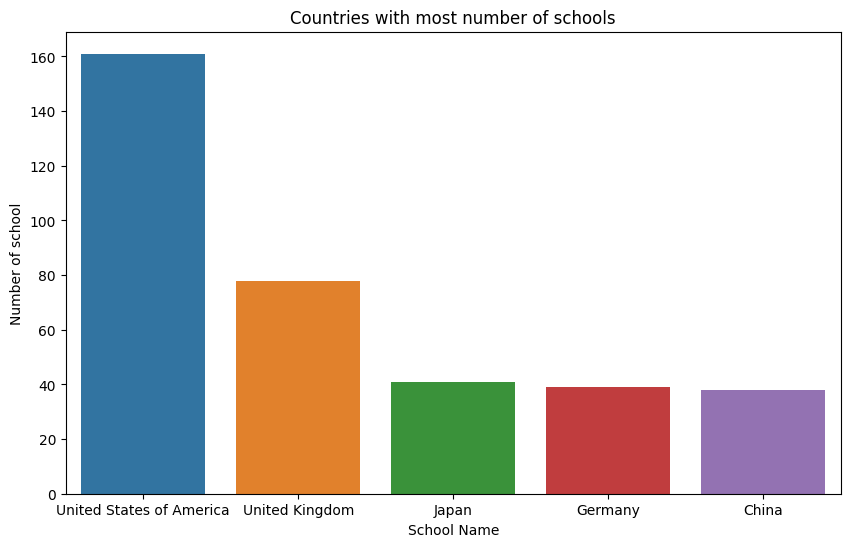

In [34]:
mostschools= snc_df.groupby('country').school_name.count().sort_values(ascending=False).head()

ypoints = np.array(mostschools)
xpoints = np.array(mostschools.index)

plt.figure(figsize=(10,6))

sns.barplot(x=xpoints , y=ypoints)
sns.set_style("darkgrid")

plt.xlabel("School Name")
plt.ylabel("Number of school")
plt.title("Countries with most number of schools")
plt.show

From the plot we can see that USA has the most number of Schools followed by UK, Japan, Germany and China

### Analysing Times dataset
We will use iplot from plotly to plot a piechart to see the Universities Number of Students rates.

In [35]:
from plotly.offline import iplot

df2016 = times[times.year == 2016].iloc[:10,:]
pie_list=[
    float(val.replace(',','.'))
    for val in df2016.num_students
]
fig={
    "data":[
        {
            "values": pie_list,
            "labels": df2016.university_name,
            "hoverinfo": "label+percent+name",
            "hole": .3,
            "type": "pie"

        },],
    "layout":{
        "title":"Universities Number of Students rates",
        "annotations":[
            {"font":{"size": 15},
             "showarrow": False,
             "text": "Number of Students",
             },
        ]
    }
}
iplot(fig)

Here we can see Harvard University has the most number of students compared to other top 10 unoversities. Closely followed by Oxford, Cambridge and so on.

## Brivariate Analysis:

In [36]:
Top10=cwur.head(10)
Top10

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,7,9,1,1,1,1,5,100.00
1,9,17,3,12,4,4,1,91.67
2,17,11,5,4,2,2,15,89.50
3,10,24,4,16,16,11,50,86.17
4,2,29,7,37,22,22,18,85.21
5,8,14,2,53,33,26,101,82.50
6,13,28,9,15,13,19,26,82.34
7,14,31,12,14,6,15,66,79.14
8,23,21,10,13,12,14,5,78.86
9,16,52,6,6,5,3,16,78.55


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

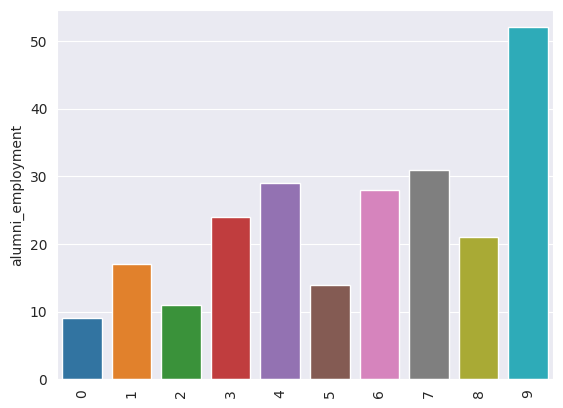

In [37]:
sns.barplot(x=Top10.index,y='alumni_employment',data=Top10).set_xticklabels(labels=Top10.index,rotation=90)

### Analysing Center for World Universsity Rankings
Using Seaborn we can plot a barplot to analyse the Alumni employment rankings of top 10 institutions.



<function matplotlib.pyplot.show(close=None, block=None)>

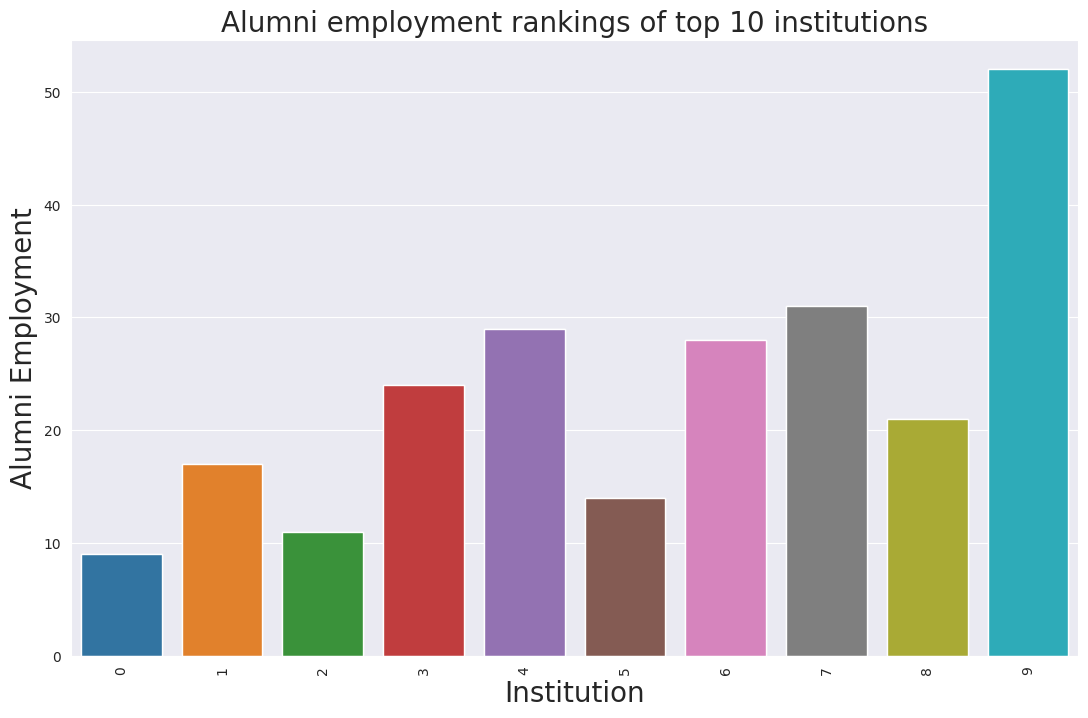

In [38]:
topi= cwur.head(10)

plt.figure(figsize=(13,8))

sns.barplot(x=topi.index , y=topi['alumni_employment'])
sns.barplot(x=topi.index , y=topi['alumni_employment']).set_xticklabels(labels=topi.index,rotation=90)

plt.xlabel("Institution",fontsize=20)
plt.ylabel("Alumni Employment",fontsize=20)
plt.title("Alumni employment rankings of top 10 institutions", fontsize=20)
plt.show

From the above barplot we can conclude that University of California has the highest Alumni Employment despite having 10th rank.

We can also plot a lineplot to take a look at the top 10 universities with their rankings and score

<function matplotlib.pyplot.show(close=None, block=None)>

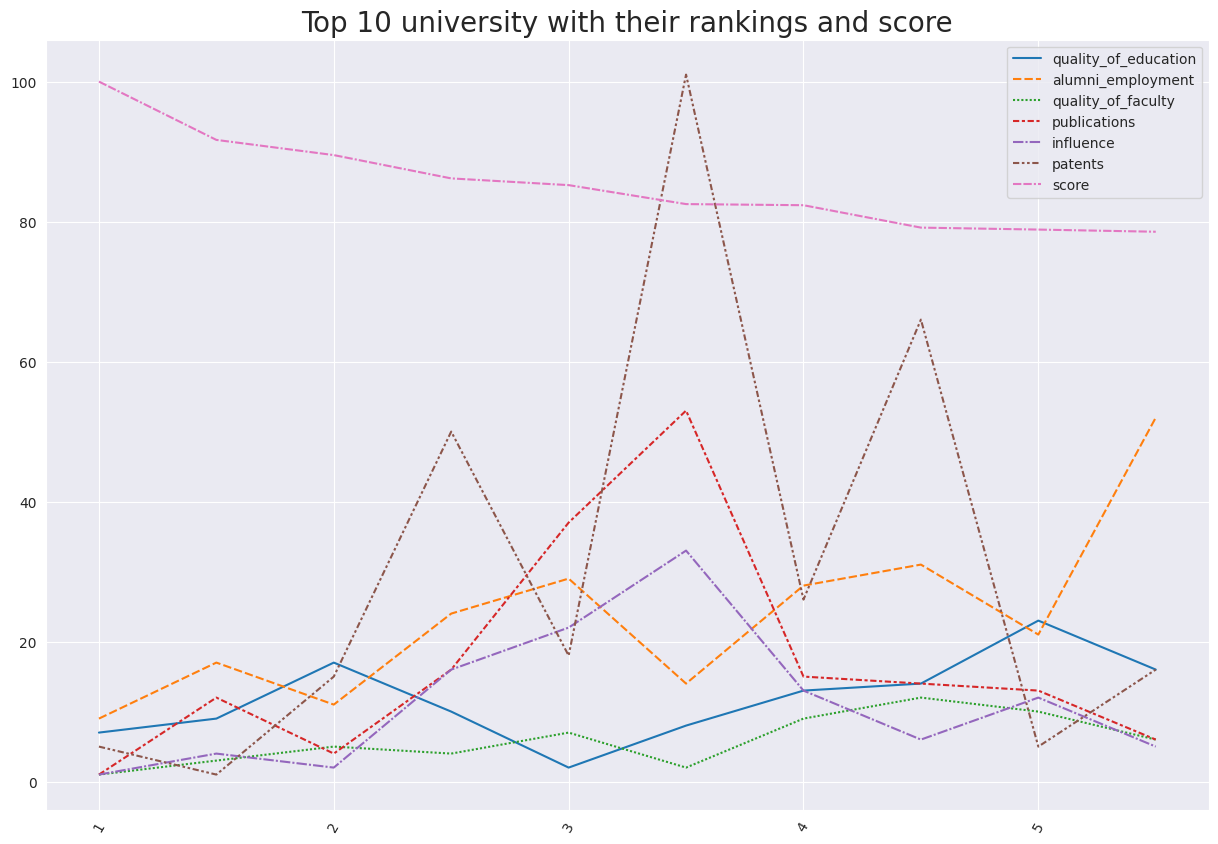

In [39]:
topi_f = topi.loc[:,['quality_of_education','alumni_employment','quality_of_faculty','publications','influence','patents','score']]
plt.figure(figsize=(15,10))
sns.lineplot(data=topi_f, linestyle='--').set_xticklabels(labels=topi_f.index,rotation=60)
plt.title("Top 10 university with their rankings and score",fontsize=20)
plt.show

### Analysing Shanghai Ranking dataset

Now let's split the Dataset into train and test sets. First split the dataset into x and y and then split the data set.

We can use the features in the Shanghai dataset to create a score column and then plot New Score Rank and national rank vs World Rank of Top 10 Universities

In [40]:
shan_features = ['alumni','award','hici','ns','pub','pcp']
shan['Score']=(shan[shan_features].sum(axis=1)/len(shan_features))*0.1
shan['Score_rank']=(10-shan['Score']).apply(np.ceil)
shan.award=shan.award*0.1
shan.head(5)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,Score,Score_rank
0,1,Harvard University,1,100.0,100.0,10.00,100.0,100.0,100.0,72.4,2005,9.540000,1.0
1,2,University of Cambridge,1,73.6,99.8,9.34,53.3,56.6,70.9,66.9,2005,7.348333,3.0
2,3,Stanford University,2,73.4,41.1,7.22,88.5,70.9,72.3,65.0,2005,6.833333,4.0
3,4,"University of California, Berkeley",3,72.8,71.8,7.60,69.4,73.9,72.2,52.7,2005,6.933333,4.0
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,8.06,66.7,65.8,64.3,53.0,2005,6.740000,4.0


In [41]:
def linelivechart(data, tr_1, tr_2):
    df = data.iloc[:10, :]

    import plotly.graph_objs as go
    from plotly.offline import iplot

    trace1 = go.Scatter(
        x=df[tr_1],
        y=df[tr_2],
        mode="lines+markers",
        name="Score rank",
        marker=dict(color='rgba(16, 112, 2, 0.8)'),
        text=df.index
    )

    trace2 = go.Scatter(
        x=df['world_rank'],
        y=df['national_rank'],
        mode="lines+markers",
        name="National Rank",
        marker=dict(color='rgba(80, 26, 90, 0.8)'),
        text=df.index
    )

    data = [trace1, trace2]
    layout = dict(
        title='New Score Rank and National Rank vs World Rank of Top 10 Universities',
        xaxis=dict(title='World Rank', ticklen=5, zeroline=True)
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

linelivechart(shan, 'world_rank', 'Score_rank')


## Multivariate Analysis

We can plot correlation graph to take a look at the relationship between features

<function matplotlib.pyplot.show(close=None, block=None)>

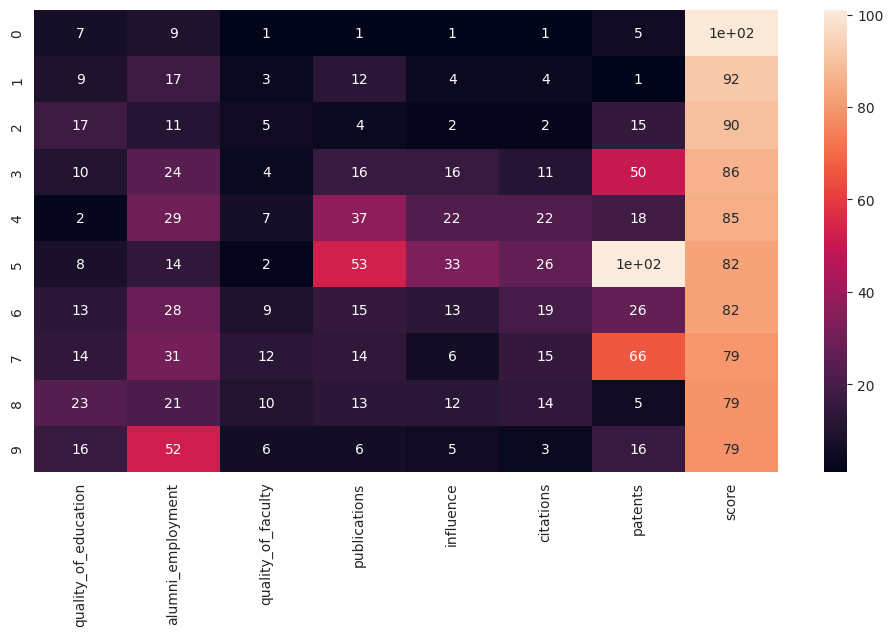

In [42]:
topi = cwur.head(10)

topi_f = topi.loc[:,['quality_of_education','alumni_employment',
                     'quality_of_faculty','publications','influence','citations','patents','score']]
plt.figure(figsize=(12,6))

sns.heatmap(data=topi_f,annot=True)

plt.show

Text(0.5, 1.0, 'Correlation Graph')

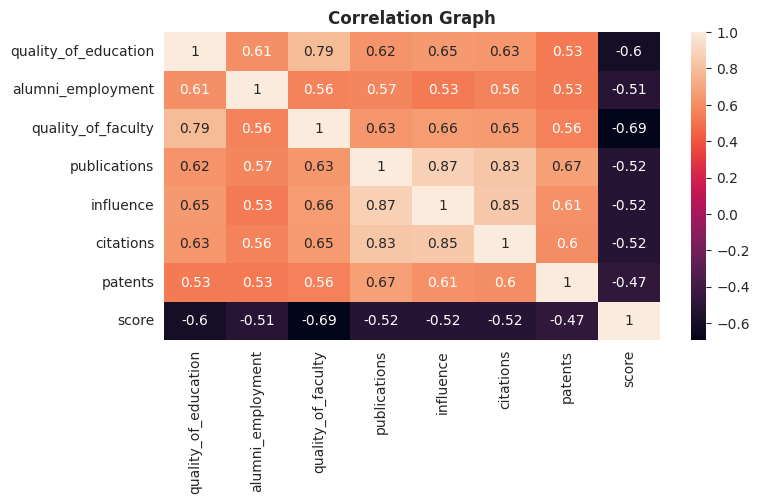

In [43]:
plt.figure(figsize=(8,4))
sns.heatmap(cwur.corr(),annot=True)
plt.title("Correlation Graph",fontweight="bold")

## Splitting data into train and test

Now let’s split the Dataset into train and test sets. First split the dataset into x and y and then split the data set.


In [44]:
X = cwur.iloc[:,:-1]
Y = cwur.iloc[:,-1:]

X.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,7,9,1,1,1,1,5
1,9,17,3,12,4,4,1
2,17,11,5,4,2,2,15
3,10,24,4,16,16,11,50
4,2,29,7,37,22,22,18


In [45]:
Y.head()

,score
0,100.00
1,91.67
2,89.50
3,86.17
4,85.21


In [46]:
Y.shape

(2200, 1)

Here x and y variables are created. On x variable, features are passed. And on y target variable is passed. For splitting training and testing data we are using train_test_split() function from sklearn. As parameters, we are passing x, y, test_size, random_state.


In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

# Model Building

## Training the model in multiple algorithms
Now our data is cleaned and it’s time to build the model. We can train our data on different algorithms. For this project we are applying five regression algorithms. The best model is saved based on its performance

### Linear Regression Model
A function named linReg is created and train and test data are passed as the parameters. Inside the function, LinearRegression algorithm is initialised and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable.

In [48]:
X_train

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
1656,367,416,218,474,419,511,350
752,355,478,210,419,659,609,170
892,355,375,210,656,458,609,737
1041,355,436,210,777,699,609,552
1179,355,478,210,888,974,800,373
...,...,...,...,...,...,...,...
1638,367,266,218,347,620,511,196
1095,355,478,210,674,766,800,637
1130,355,478,210,942,950,800,552
1294,60,48,182,166,160,93,84


In [49]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1760, 7)
(440, 7)
(1760, 1)
(440, 1)


In [50]:
lr=LinearRegression()

In [51]:
lr.fit(X_train,Y_train)

LinearRegression()

In [52]:
lr.coef_

array([[-3.91536096e-03, -5.43572541e-03, -6.43551744e-02,
        -9.06741120e-04, -7.02152364e-05, -1.67289660e-04,
        -1.42600369e-03]])

In [53]:
lr.intercept_

array([63.48062321])

In [54]:
Y_pred=lr.predict(X_test)

In [55]:
Y_pred

array([[45.3956187 ],
       [44.73326859],
       [43.68856389],
       [43.8085854 ],
       [43.75343027],
       [43.95007122],
       [43.37527123],
       [45.88079549],
       [44.4704051 ],
       [44.61993909],
       [44.65077732],
       [45.01178227],
       [45.12164291],
       [43.53899086],
       [43.40764462],
       [44.61081866],
       [44.73727493],
       [59.0872798 ],
       [43.00598543],
       [45.25987141],
       [44.11351395],
       [43.55218343],
       [45.14831153],
       [44.77283165],
       [59.29351553],
       [43.73958526],
       [44.88360403],
       [46.72926609],
       [47.49698859],
       [60.79514516],
       [44.14425313],
       [45.25216567],
       [44.09762921],
       [45.01827921],
       [43.49200014],
       [45.22662981],
       [43.13727088],
       [58.3320969 ],
       [48.26420708],
       [48.02845672],
       [44.97572472],
       [43.91641771],
       [46.31502394],
       [56.02700629],
       [49.48958315],
       [56

In [56]:
prediction = lr.predict(X_test)

In [82]:
Y_pred = lr.predict([[7,9,1,1,1,1,5]])

In [83]:
print(Y_pred)

[[63.33166471]]


### Lasso Regression model
A function named lassoReg is created and train and test data are passed as the parameters. Inside the function, linear_model.Lasso algorithm is initialised and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in a new variable.

In [58]:
lar= linear_model.Lasso(alpha=0.1)

In [59]:
lar.fit(X,Y)

Lasso(alpha=0.1)

In [60]:
Y_pred1=lar.predict(X_test)

In [61]:
Y_pred1

array([45.59313838, 44.96489877, 43.79260127, 43.89152794, 43.83497462,
       43.85374566, 43.35177197, 45.89124917, 44.43936047, 44.64386352,
       44.77366963, 44.91867645, 45.22370579, 43.55530757, 43.39566878,
       44.72883626, 44.92842671, 58.83545063, 43.01405797, 45.44871446,
       44.04741013, 43.64123406, 45.24093925, 44.88400784, 59.0726629 ,
       43.7762511 , 45.00175385, 46.8006508 , 47.59935897, 60.50950221,
       44.07250263, 45.37458933, 43.99161785, 44.9707875 , 43.56014613,
       45.32576112, 43.15541367, 58.02615223, 48.50127536, 48.24372479,
       44.92107527, 43.84063276, 46.36823988, 55.93663652, 49.49051872,
       56.01211468, 52.98132413, 44.09249532, 46.39786347, 61.42953703,
       45.71948868, 43.02955059, 58.5338544 , 49.50393478, 42.57739101,
       47.55179845, 43.28258987, 44.42342028, 44.87648027, 44.76495122,
       48.03123179, 43.10406733, 44.10827365, 48.78285744, 43.17063977,
       52.11260168, 44.63821337, 56.54089423, 52.02867382, 49.32

In [84]:
Y_pred1 = lar.predict([[7,9,1,1,1,1,5]])

In [85]:
print(Y_pred1)

[62.96954351]


### Support Vector Regression Model
A function named svr is created and train and test data are passed as the parameters. Inside the function, SVR algorithm is initialised and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in new variable.

In [62]:
svr = SVR().fit(X,Y)
svr

SVR()

In [63]:
Y_pred2= svr.predict(X_test)

In [86]:
Y_pred2 = svr.predict([[7,9,1,1,1,1,5]])

In [87]:
print(Y_pred2)

[60.0246015]


### Decision Tree Regression Model
A function named dt is created and train and test data are passed as the parameters. Inside the function, DecisionTreeRegressor algorithm is initialised and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in new variable.

In [64]:
dt = DecisionTreeRegressor(random_state = 0)

In [65]:
dtr= dt.fit(X,Y)
dtr

DecisionTreeRegressor(random_state=0)

In [66]:
Y_pred3 = dt.predict(X_test)

In [88]:
Y_pred3 = dt.predict([[7,9,1,1,1,1,5]])

In [89]:
print(Y_pred3)

[100.]


### Random Forest Regression Model
A function named rf is created and train and test data are passed as the parameters. Inside the function, RandomForestRegressor algorithm is initialised and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in new variable

In [67]:
rf = RandomForestRegressor(n_estimators = 100,random_state=0)

In [68]:
rf.fit(X,Y)

RandomForestRegressor(random_state=0)

In [69]:
Y_pred4 = rf.predict(X_test)

In [78]:
Y_pred4 = rf.predict([[7,9,1,1,1,1,5]])

In [79]:
print(Y_pred4)

[99.42905833]


# Performance Testing
## Testing model with multiple evaluation metrics
Multiple evaluation metrics means evaluating the model's performance on a test set using different performance measures. This can provide a more comprehensive understanding of the model's strengths and weaknesses. We are using evaluation metrics for regression tasks including Mean absolute Error, Mean Squared Error, Root Mean Squared Error and R square Score.

In [70]:
Y_pred = Y_pred.reshape(-1, 1)

# Ensure Y_test and Y_pred are NumPy arrays
Y_test = np.array(Y_test)
Y_pred = np.array(Y_pred)

In [71]:
print("Shape of Y_test:", Y_test.shape)
print("Shape of Y_pred:", Y_pred.shape)


Shape of Y_test: (440, 1)
Shape of Y_pred: (440, 1)


In [72]:
print("Prediction Evaluation using Linear Regression")

print("MAE: ",mean_absolute_error (Y_test, Y_pred))

print("MSE:",mean_squared_error (Y_test, Y_pred))

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))

print("R^2: ",r2_score (Y_test,Y_pred))

Prediction Evaluation using Linear Regression
MAE:  2.6657340636132827
MSE: 28.917809410716295
RMSE:  5.377528187812342
R^2:  0.4630797766933825


In [73]:
print("Prediction Evaluation using Lasso Regression")

print("MAE: ",mean_absolute_error (Y_test, Y_pred1))

print("MSE:",mean_squared_error (Y_test, Y_pred1))

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred1)))

print("R^2: ",r2_score (Y_test,Y_pred1))

Prediction Evaluation using Lasso Regression
MAE:  2.621433780854665
MSE: 28.72302541971291
RMSE:  5.359386664508627
R^2:  0.4666963529858916


In [74]:
print("Prediction Evaluation using SupportVectro Regression")

print("MAE: ",mean_absolute_error (Y_test, Y_pred2))

print("MSE:",mean_squared_error (Y_test, Y_pred2))

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred2)))

print("R^2: ",r2_score (Y_test,Y_pred2))

Prediction Evaluation using SupportVectro Regression
MAE:  1.6897043251374504
MSE: 26.027553881375635
RMSE:  5.101720678494231
R^2:  0.5167434765326828


In [75]:
print("Prediction Evaluation using DeciswionTree Regressor")

print("MAE: ",mean_absolute_error (Y_test, Y_pred3))

print("MSE:",mean_squared_error (Y_test, Y_pred3))

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred3)))

print("R^2: ",r2_score (Y_test,Y_pred3))

Prediction Evaluation using DeciswionTree Regressor
MAE:  1.6148698540002276e-17
MSE: 1.1474340439578353e-31
RMSE:  3.387379583037359e-16
R^2:  1.0


In [76]:
print("Prediction Evaluation using RandomForest Regressor")

print("MAE: ",mean_absolute_error (Y_test, Y_pred4))

print("MSE:",mean_squared_error (Y_test, Y_pred4))

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred4)))

print("R^2: ",r2_score (Y_test,Y_pred4))

Prediction Evaluation using RandomForest Regressor
MAE:  0.1987129545454545
MSE: 0.1750542942954527
RMSE:  0.4183949023296683
R^2:  0.9967497472077167


After calling the function, the results of models are displayed as output. From the three
models random forest is performing well